# Module 11: Linear Models for Regression
## Created by MR. Malik Muhammad Zeeshan

# Problem Formulation
Here is the problem. There is a real state agent who knows that you're a Machine Learning Engineer and would like you to help out with building a machine learning model that can predict the price of the house given the information about that particular house. 

In [1]:
# Install seaborn library
#!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression


# Data Collection

In [3]:
# Task 1:
# Read the data from CSV file "housing.csv" into a dataframe named house_df
house_df = pd.read_csv("housing.csv")

In [4]:
# Task 2:
# Show the top 5 rows of data
house_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
# Task 3:
# Show the bottom 5 entries of the dataframe
house_df.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND


```
Information about the features 

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housing_median_age: Median age of a house within a block; a lower number is a newer building
4. total_rooms: Total number of rooms within a block
5. total_bedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. median_house_value: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

Source: Kaggle
```


In [6]:
# Task 4:
# Use info() method to see (i) Total entries (ii) Total null entries
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# Task 5:
# Use len(house_df) to see the length of the dataframe
len(house_df)

20640

In [8]:
# Task 6:
# Use len(house_df.columns) to see the total number of columns
len(house_df.columns)

10

# Exploratory Data Analysis

In [43]:
# Task 7: Split the data into train set and test set. Train set will be 90% and test set will be 10% of the total data. 
# random_state ensures that the split is same if rerun the notebook
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(house_df, test_size=0.1, random_state=0)

In [44]:
train_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2255     -119.83     36.80                16.0       6101.0          1200.0   
17341    -120.40     34.86                11.0       1633.0           348.0   
11589    -118.03     33.78                26.0       2001.0           302.0   
13635    -117.32     34.09                38.0       1585.0           345.0   
693      -122.11     37.70                23.0       1689.0           461.0   

       population  households  median_income  median_house_value  \
2255       3407.0      1134.0         3.1250             80800.0   
17341       504.0       327.0         2.0508            275000.0   
11589       836.0       298.0         5.1061            257500.0   
13635      1347.0       368.0         2.3750             75300.0   
693         828.0       443.0         2.1552            161400.0   

      ocean_proximity  
2255           INLAND  
17341       <1H OCEAN  
11589       <1H OCEAN  
13635          INLAND  
693          NEAR BAY

In [10]:
# Task 8: Determine the lengths of train data and test data
print("The length of train data is = ", len(train_data))
print("The length of test data is = ", len(test_data))

The length of train data is =  18576
The length of test data is =  2064


In [12]:
# Task 10: 
# Describe the train data with describe method. Use train_data.describe(include='all')
train_data.describe(include='all')

longitude      latitude  housing_median_age   total_rooms  \
count   18576.000000  18576.000000        18576.000000  18576.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN           NaN                 NaN           NaN   
freq             NaN           NaN                 NaN           NaN   
mean     -119.567530     35.630217           28.661068   2631.567453   
std         2.000581      2.133260           12.604039   2169.467450   
min      -124.350000     32.540000            1.000000      2.000000   
25%      -121.790000     33.930000           18.000000   1445.000000   
50%      -118.490000     34.260000           29.000000   2127.000000   
75%      -118.010000     37.710000           37.000000   3149.000000   
max      -114.490000     41.950000           52.000000  39320.000000   

        total_bedrooms    population    households  median_income  \
count     18390.000000  18576.000000  18576.000000   18576.000000   
unique             NaN           NaN           NaN            NaN   
top                NaN           NaN           NaN            NaN   
freq               NaN           NaN           NaN            NaN   
mean        537.344698   1422.408376    499.277078       3.870053   
std         417.672864   1105.486111    379.473497       1.900225   
min           1.000000      3.000000      1.000000       0.499900   
25%         295.000000    785.750000    279.000000       2.564300   
50%         435.000000   1166.000000    410.000000       3.534100   
75%         648.000000   1725.000000    606.000000       4.742725   
max        6445.000000  28566.000000   6082.000000      15.000100   

        median_house_value ocean_proximity  
count         18576.000000           18576  
unique                 NaN               5  
top                    NaN       <1H OCEAN  
freq                   NaN            8231  
mean         206881.011305             NaN  
std          115237.605962             NaN  
min           14999.000000             NaN  
25%          120000.000000             NaN  
50%          179800.000000             NaN  
75%          264700.000000             NaN  
max          500001.000000             NaN

In [13]:
# Task 11:
# Check for missing values in train data. Use isnull().sum() for train data
train_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        186
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
# Task 12: 
# Perform value_counts() for the column "ocean_proximity" in train data
train_data["ocean_proximity"].value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

<Axes: xlabel='ocean_proximity', ylabel='count'>

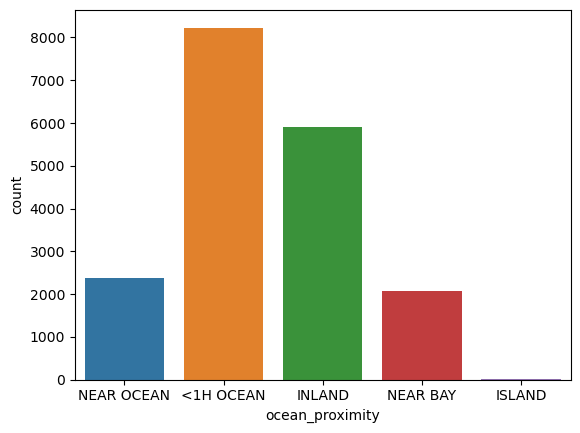

In [15]:
# Task 13:
# Let's make a value_count plot using seaborn
sns.countplot(data=train_data, x= 'ocean_proximity')

In [16]:
# Task 14:
# Perform correlation using ".corr()" method on train data and store it in variable "correlation"
correlation = train_data.corr()

C:\Users\Abbasi-Laptop\AppData\Local\Temp\ipykernel_10668\2999561364.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_data.corr()


In [17]:
# Task 15: 
# See the correlation of "median_house_value" variable with all other variables
# hint: correlation['median_house_value']
# Which variable is strongly correlated with house value?
correlation["median_house_value"]

longitude            -0.048622
latitude             -0.142543
housing_median_age    0.105237
total_rooms           0.133927
total_bedrooms        0.049672
population           -0.026109
households            0.065508
median_income         0.685433
median_house_value    1.000000
Name: median_house_value, dtype: float64

<Axes: >

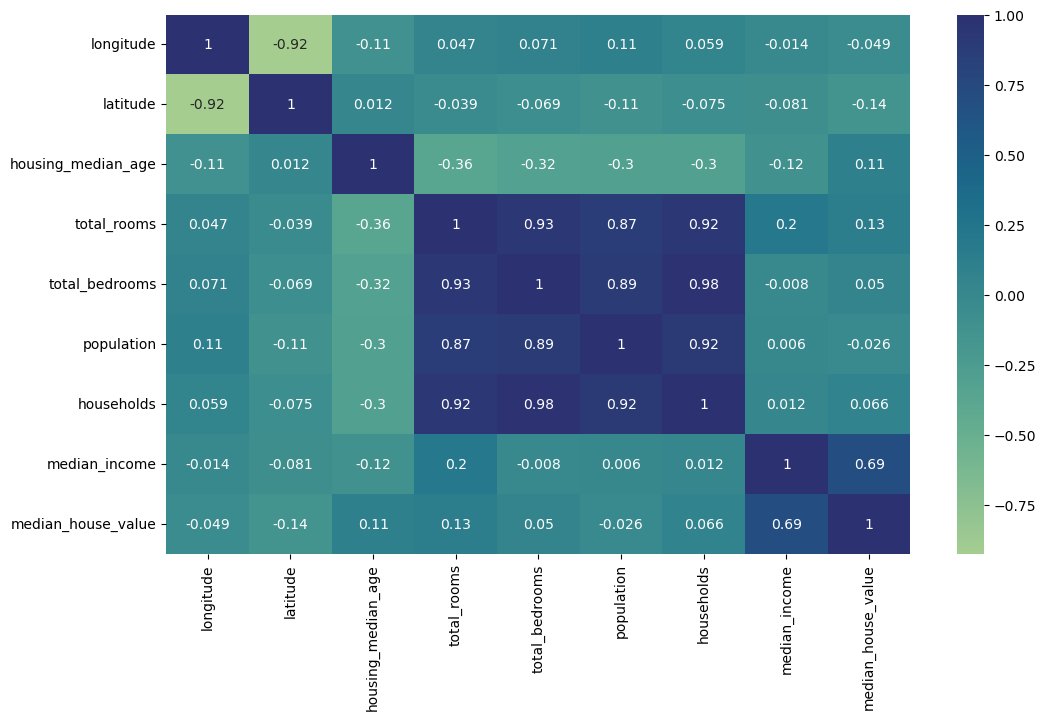

In [18]:
# Task 16:
# Visualizing the correlation
plt.figure(figsize=(12,7))
sns.heatmap(correlation, annot=True, cmap='crest')

<Axes: xlabel='longitude', ylabel='latitude'>

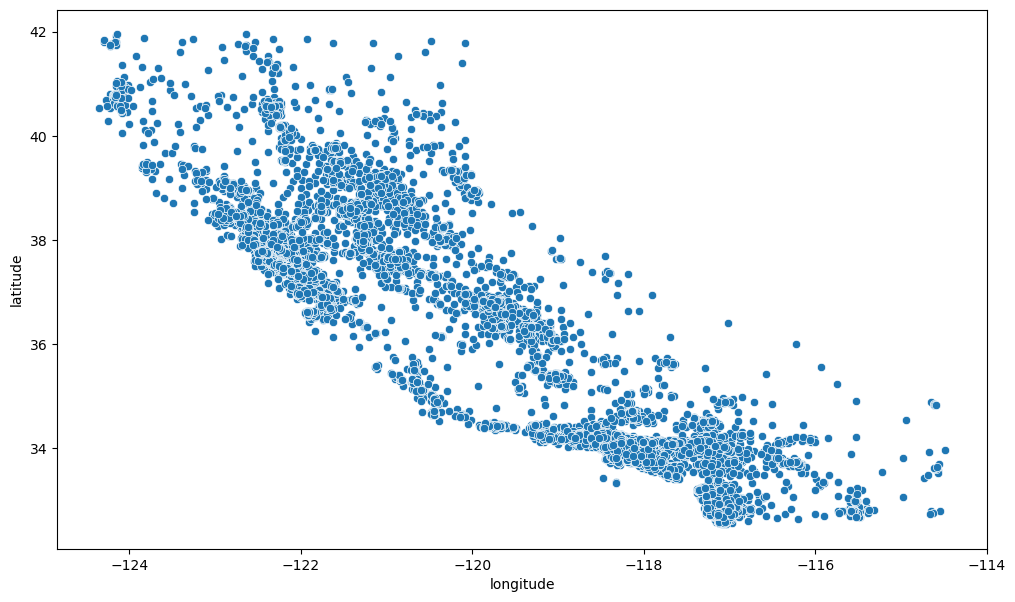

In [19]:
# Task 17:
# Plotting the locations of the houses
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

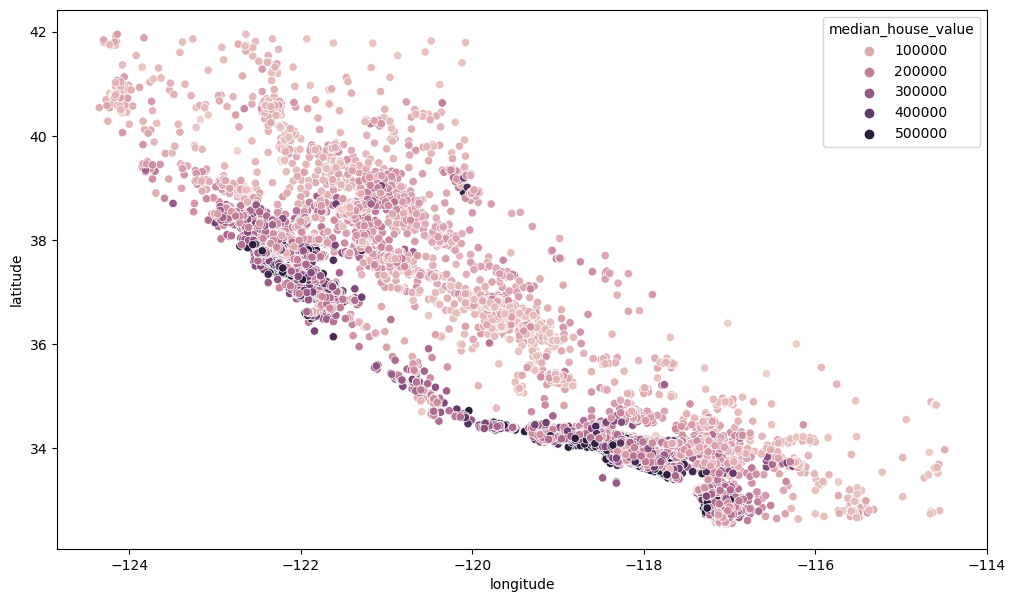

In [20]:
# Task 18:
# Plotting the locations of the houses alongwith house value
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='median_house_value')

<Axes: xlabel='longitude', ylabel='latitude'>

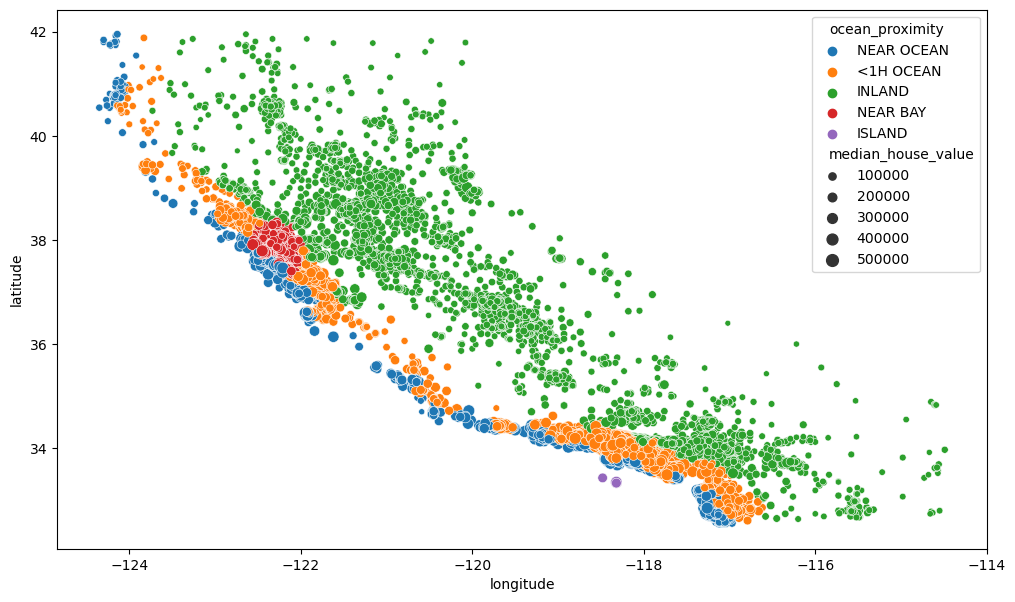

In [21]:
# Task 19:
# Plotting locations alongwith house value and ocean proximity
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='ocean_proximity', 
                size='median_house_value')

<Axes: xlabel='median_house_value', ylabel='median_income'>

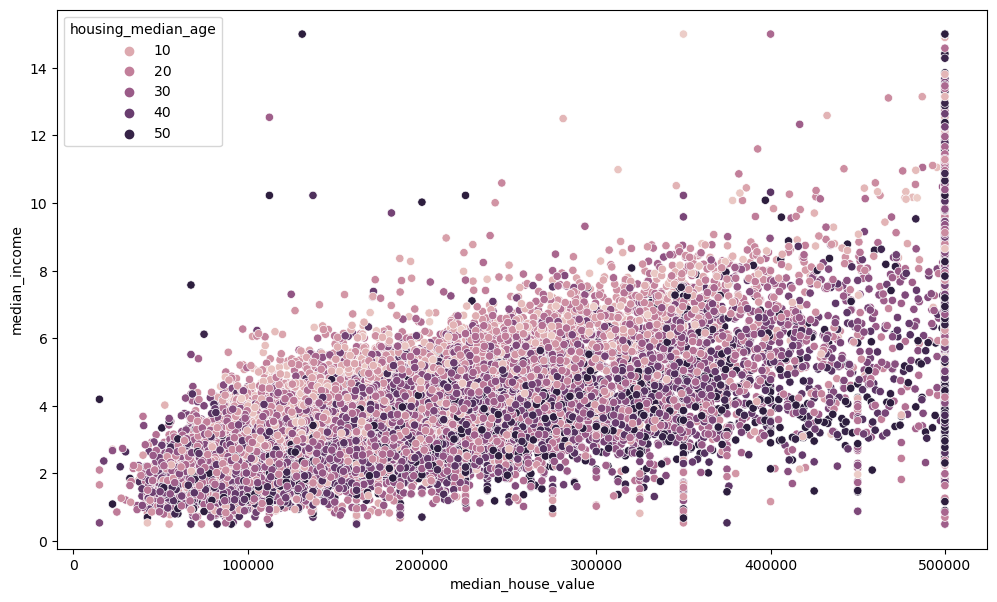

In [22]:
# Task 20:
# Similar to Task 17, make a scatter plot between strongly correlated variables 
# x = 'median_house_value' and y= 'median_income' with hue='housing_median_age'
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='median_house_value', y='median_income', hue = 'housing_median_age')

There are times you want to quickly see different plots to draw insights from the data. In that case, you can use grid plots. Seaborn, a visualization library provides a handy function for that.

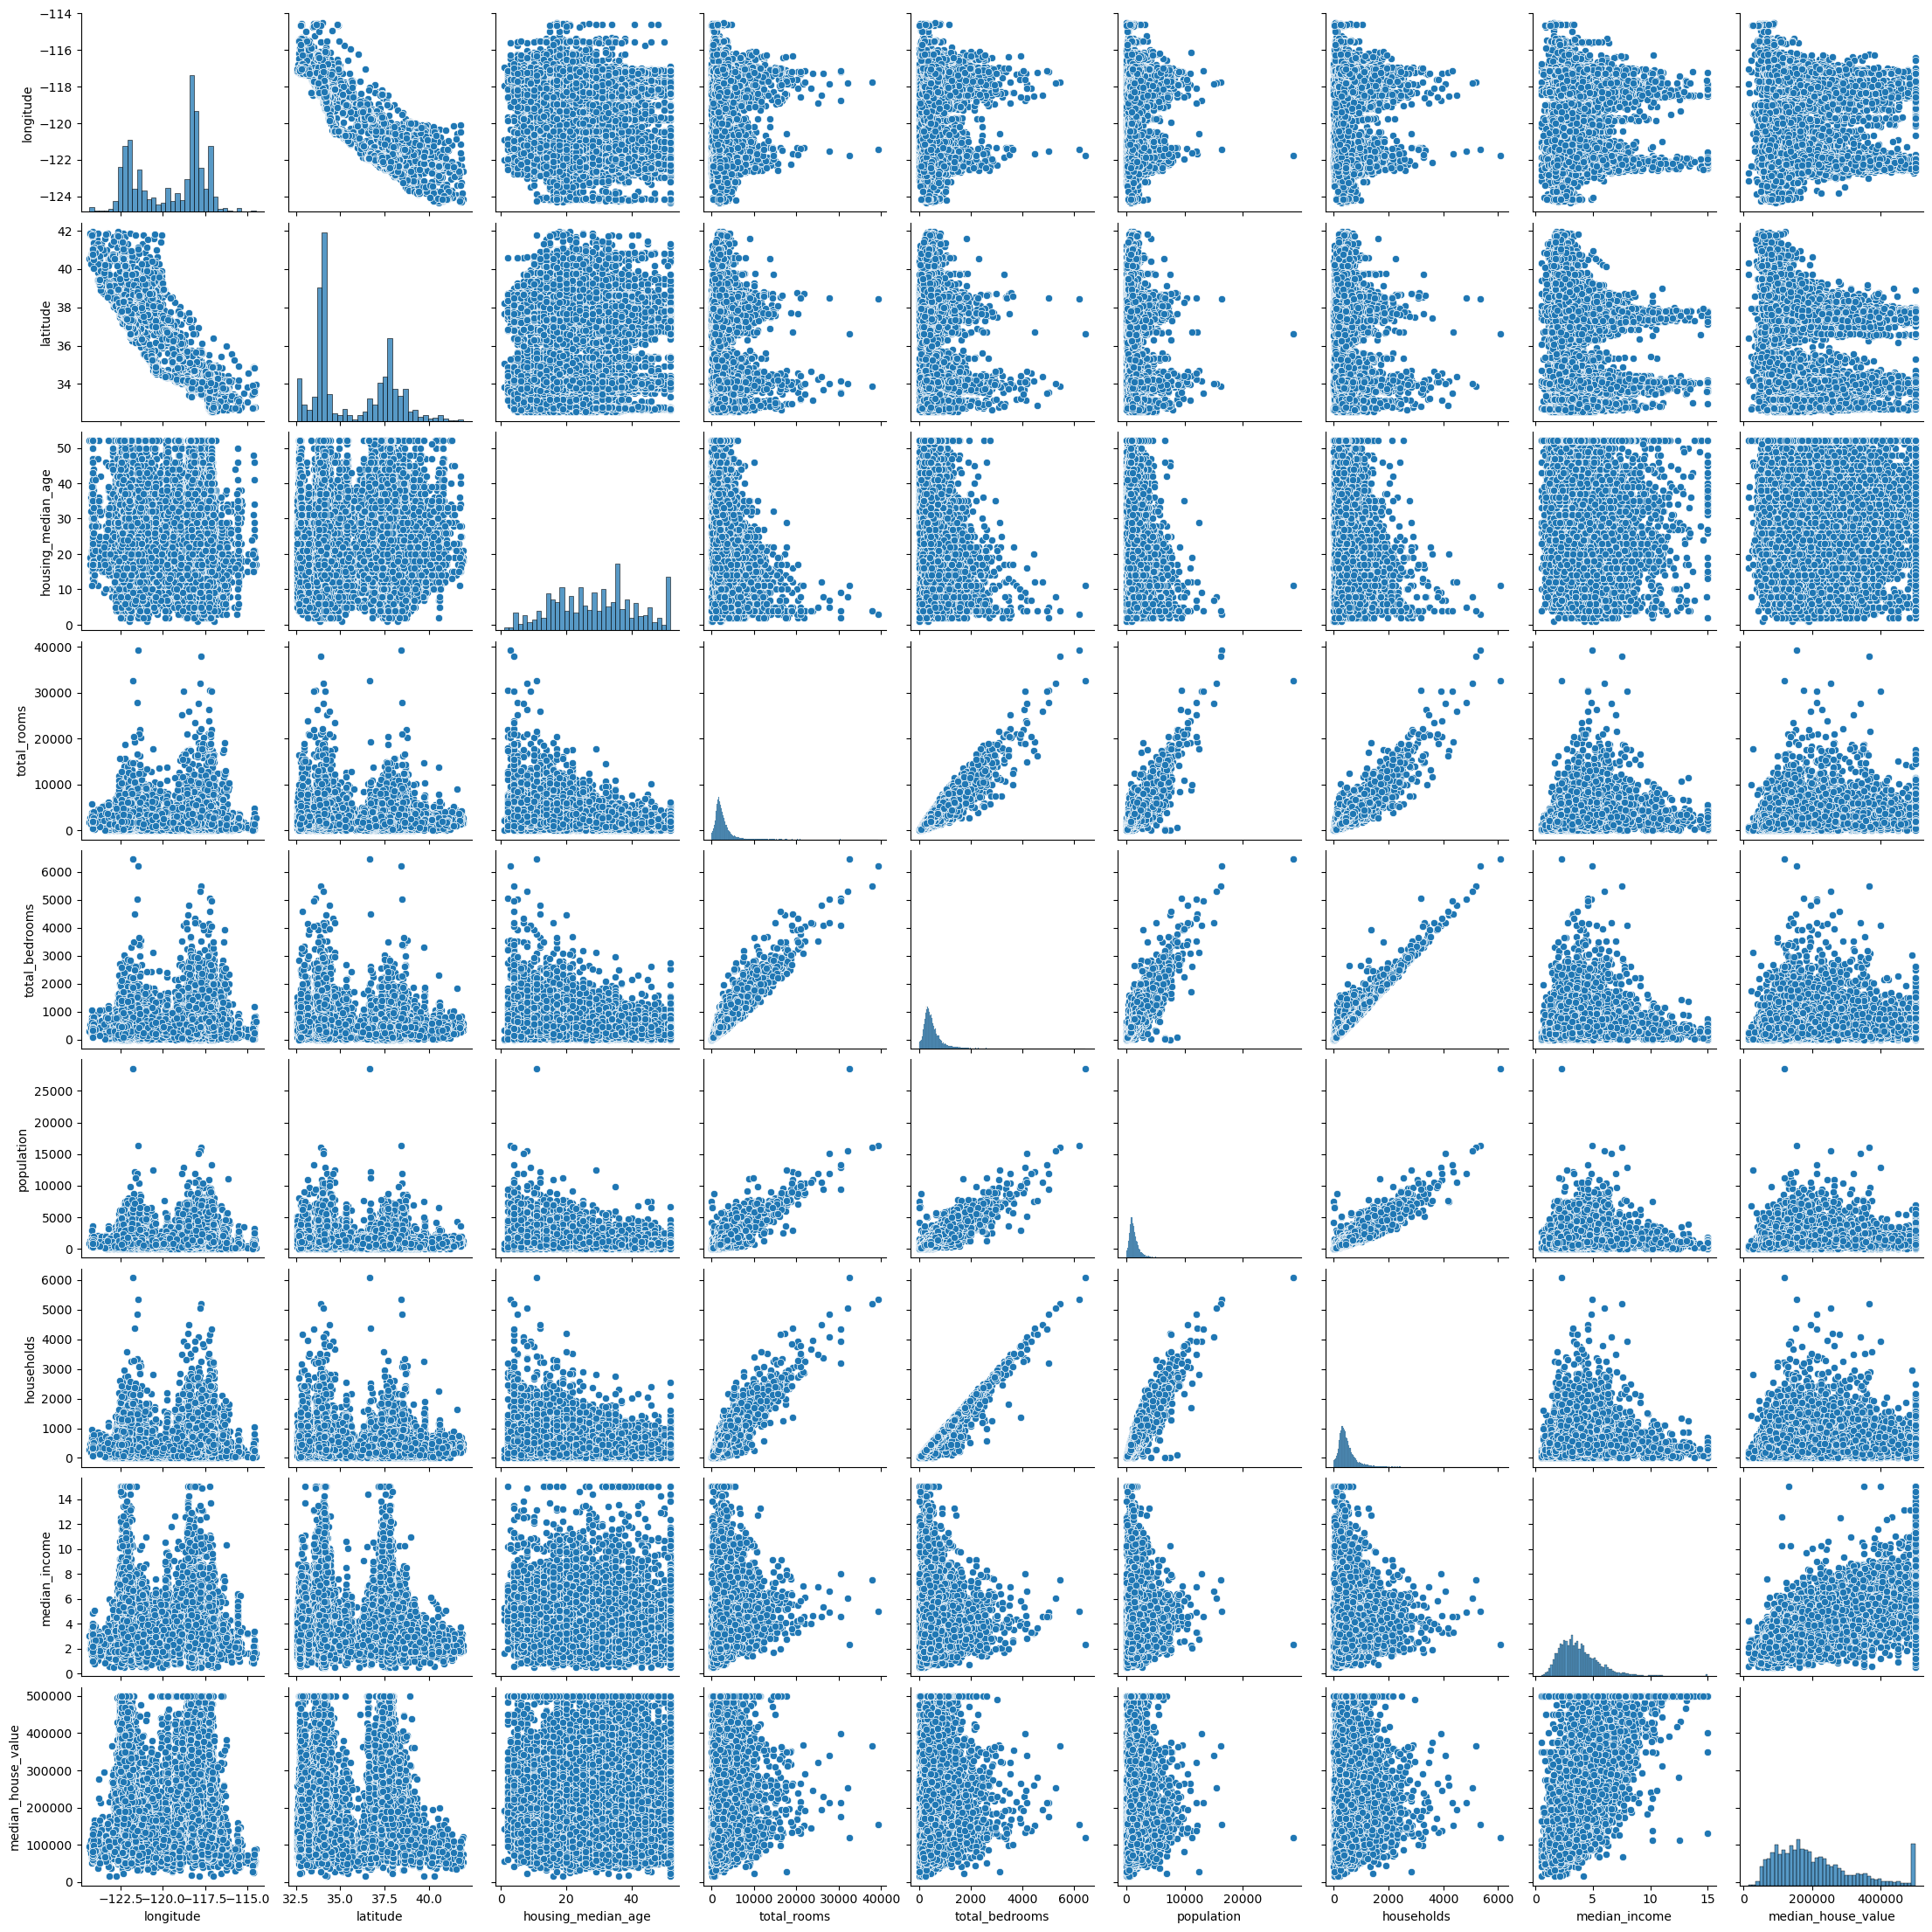

In [23]:
sns.pairplot(train_data)

# Data processing
In this part, it's where we prepare the data to be in proper format that will be accepted by the ML model. The processing functions that we apply to training set must also be applied to the test set.

Here are three most things that we will take care of in our dataset:

* Missing values
* Encoding categorical features 
* Scaling numerical features


As much as we can we will use functions so that we can rerun the same transformations on the test set. 

Since we are going to prepare the data for the ML model, let's create an input training data and the training label, label being `median_house_value`. Since the data is a Pandas dataframe, we will use `drop` function. Let's do that!

In [24]:
X_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']

### Handling Missing Values

In [25]:
# Task 21:
# Let's extract all the numerical columns in X_train data. Note that all columns 
# are numerical except "ocean_proximity". 
num_feats = X_train.drop('ocean_proximity', axis=1)

In [26]:
# Task 22:
# Check null values in num_feats
num_feats.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        186
population              0
households              0
median_income           0
dtype: int64

In [27]:
# Task 23:
# Let's import imputer library
from sklearn.impute import SimpleImputer

In [28]:
# Task 24:
# Create imputer
mean_imputer = SimpleImputer(strategy='mean')

In [32]:
# Task 25: 
# Let's impute the numerical features
num_feats_imputed = mean_imputer.fit_transform(num_feats)
X_train.shape

(18576, 9)

In [33]:
# Task 26:
# Convert the imputed data to a pandas dataframe
num_feats_imputed = pd.DataFrame(num_feats_imputed, 
                                 columns=num_feats.columns, index=num_feats.index)

In [34]:
# Task 27:
# Check if there are still any null values in num_feats_imputed dataframe
num_feats_imputed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64